# Importation des packages et les données

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('Openhealth_S-Grippal.csv.', sep = ';', header = 0 )

# 1. 

## 1.1. Constitution de la base de données IAS_brut

In [4]:
df.head(5)
df = pd.DataFrame(df)

Il y a 05 variables dont le temps et les autres. On va travailler uniquement sur la variable "IAS_brut". On supprime donc les deux dernières.

In [5]:
df_1 = df.copy()
df_1.head(5)

,PERIODE,IAS_brut,IAS_lisse,Incidence_Sentinelles
0,2009-07-01,"1,7","2,2","2,3"
1,2009-07-02,"3,4","2,1","2,3"
2,2009-07-03,"2,1","2,1","2,3"
3,2009-07-04,"1,3",2,"2,3"
4,2009-07-05,"14,2",2,"2,3"


In [6]:
df_1 = df.iloc[:, :-2]
df_1.head(5)

,PERIODE,IAS_brut
0,2009-07-01,"1,7"
1,2009-07-02,"3,4"
2,2009-07-03,"2,1"
3,2009-07-04,"1,3"
4,2009-07-05,"14,2"


In [7]:
# Vérifier la nature des objets
print(df_1.dtypes)

PERIODE     object
IAS_brut    object
dtype: object


La date est en bonne forme. Par contre, la nature de la colonne est en objet au lieu d'être une date. 

Par rapport à IAS_brut, on doit changer les virgules en point. Puisque ni Numpy ni pandas ne connait la signification des virgules.

## 1.2. Pré-traitement

In [8]:
## Conversion de la colonne "PERIODE" en datetime
df_1 = df_1.copy()
df_1["PERIODE"] = pd.to_datetime(df_1["PERIODE"])

## Obtention des dates de début et de fin
date_debut = df["PERIODE"].min()
date_fin = df["PERIODE"].max()

print(f"Date de début : {date_debut}")
print(f"Date de fin : {date_fin}")

Date de début : 2009-07-01
Date de fin : 2014-04-17


La période de notre série dure environ 05 année de 2009 jusqu'à 2014. Et normalement, la fréquence de la série est journalière. Voyons celà de près. 

In [9]:
# Fréquence de la série 
## Inférer la fréquence à partir de la colonne "PERIODE"
frequence = pd.infer_freq(df_1["PERIODE"])

## Afficher la fréquence
print("Fréquence de la colonne PERIODE:", frequence)

Fréquence de la colonne PERIODE: D


La fréquence de la période est D (Daily) ou journalier.

In [ ]:
On gère maintenant la variable IAS_brut.

In [10]:
# remplacer les virgules par les points
df_1['IAS_brut'] = df_1['IAS_brut'].astype(str)
df_1['IAS_brut'] = df_1['IAS_brut'].str.replace(',', '.')
df_1['IAS_brut'] = df_1['IAS_brut'].astype(float)

In [11]:
# Compter le nombre de zéros et de NaN dans la colonne 'IAS_brut'
nombre_NA = (df_1["IAS_brut"] == 0).sum() + df_1["IAS_brut"].isna().sum()
print(f"Nombre de zéros et de valeurs NaN (manquantes) dans 'IAS_brut': {nombre_NA}")

Nombre de zéros et de valeurs NaN (manquantes) dans 'IAS_brut': 8


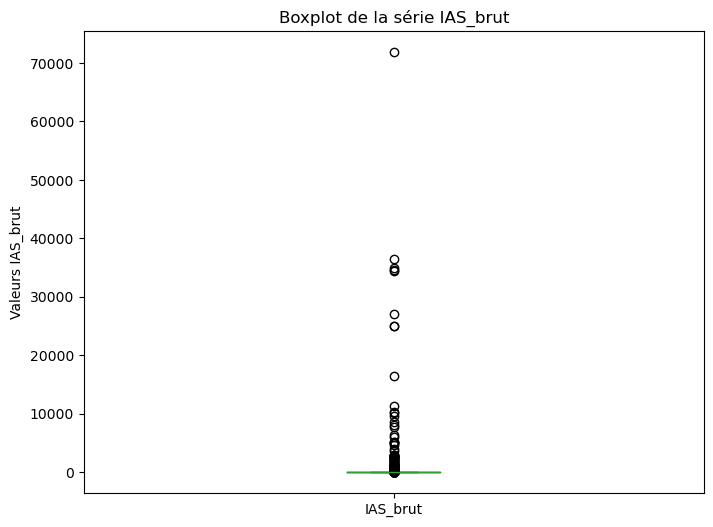

In [12]:
# Voir la distribution de la série temporelle pour établir la stratégie d'imputation
plt.figure(figsize=(8, 6))
df_1["IAS_brut"].plot(kind='box')
plt.title("Boxplot de la série IAS_brut")
plt.ylabel("Valeurs IAS_brut")
plt.show()

Il y a des valeurs très aberrantes dans la série temporelle. L'utilisation de la moyenne n'est pas une solution pour l'imputation. La médiane peut une solution mais les données sont écrasés par les valeurs aberrantes et on ne voit pas la plage de variation. Il faut faire une petite analyse pour pouvoir choisir la bonne méthode.

In [13]:
print(df_1.shape)

(1752, 2)


In [14]:
# Trouver les index où la valeur de "IAS_brut" est zéro
positions_NA = df_1[df_1["IAS_brut"] == 0].index

# Itérer sur les index trouvés
for pos in positions_NA:
    # Obtenir la position locale de l'index dans le DataFrame
    index_values = df_1.index.get_loc(pos)
    # Définir l'index de départ et de fin pour obtenir un échantillon autour de la valeur zéro
    start_index = max(index_values - 2, 0)  # Commencer deux positions avant la valeur zéro
    end_index = min(index_values + 2, len(df_1) - 1)  # Finir deux positions après la valeur zéro
    # Obtenir l'échantillon autour de la valeur zéro
    sample = df_1.iloc[start_index:end_index + 1]
    print(f"Échantillon autour de la position du zéro (index {pos}):")
    print(sample)

Échantillon autour de la position du zéro (index 340):
       PERIODE  IAS_brut
338 2010-06-04       0.5
339 2010-06-05       0.6
340 2010-06-06       0.0
341 2010-06-07       1.0
342 2010-06-08       1.0
Échantillon autour de la position du zéro (index 378):
       PERIODE  IAS_brut
376 2010-07-12       0.7
377 2010-07-13       1.0
378 2010-07-14       0.0
379 2010-07-15       0.5
380 2010-07-16       0.6
Échantillon autour de la position du zéro (index 627):
       PERIODE  IAS_brut
625 2011-03-18       3.1
626 2011-03-19       2.0
627 2011-03-20       0.0
628 2011-03-21       2.3
629 2011-03-22       2.8
Échantillon autour de la position du zéro (index 732):
       PERIODE  IAS_brut
730 2011-07-01       1.1
731 2011-07-02       0.7
732 2011-07-03       0.0
733 2011-07-04       0.4
734 2011-07-05       0.5
Échantillon autour de la position du zéro (index 858):
       PERIODE  IAS_brut
856 2011-11-04       2.4
857 2011-11-05       2.6
858 2011-11-06       0.0
859 2011-11-07       2.9


Il n'y a ni des valeurs nulles successives ni des valeurs aberrantes autour des valeurs nulles. Dans ce cas, l'interpolation peut être une méthode d'imputation efficace. Elle est particulièrement adaptée en raison de la proximité des valeurs autour des zéros. De plus, l'interpolation peut préserver la tendance et la saisonnalité des données! Des éléments que l'on aimerait étudier ultérieurement. 

In [15]:
# Remplacer les zéros par NaN pour permettre l'imputation par interpolation
df_1['IAS_brut'] = df_1['IAS_brut'].replace(0, np.nan)

# Utiliser l'interpolation en arrière pour imputer les valeurs manquantes avec la valeur suivante non manquante
df_1['IAS_brut'] = df_1['IAS_brut'].interpolate(method='bfill')

In [16]:
df_2 = df_1.copy()

In [17]:
# Compter le nombre de zéros et de NaN dans la colonne 'IAS_brut'
nombre_NA = (df_2["IAS_brut"] == 0).sum() + df_2["IAS_brut"].isna().sum()
print(f"Nombre de zéros et de valeurs NaN (manquantes) dans 'IAS_brut': {nombre_NA}")

Nombre de zéros et de valeurs NaN (manquantes) dans 'IAS_brut': 0


# 2. Tracer la série temporelle

<Axes: xlabel='PERIODE', ylabel='IAS_brut'>

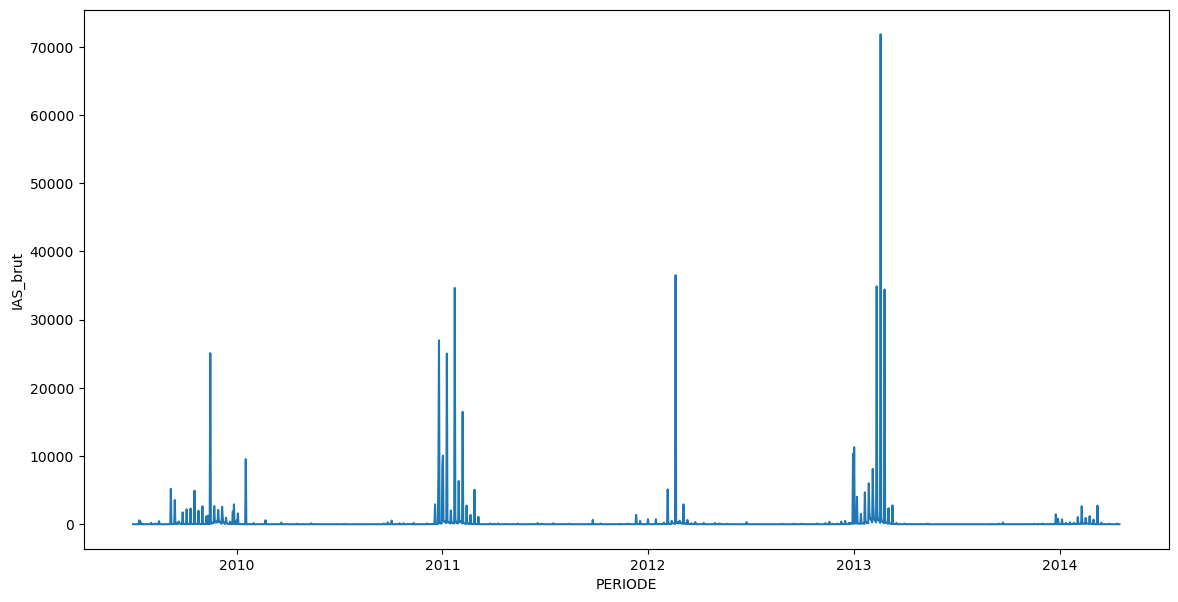

In [18]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_2, x='PERIODE', y='IAS_brut')

A chaque début d'année, on constate la répétition de certaines valeurs plus ou moins extrêmement grandes. A part le fait que ce sont des valeurs aberrantes, elles peuvent constituer aussi le signe d'une saisonnalité.

# Le diagramme de la loi marginale

<Axes: xlabel='IAS_brut', ylabel='Count'>

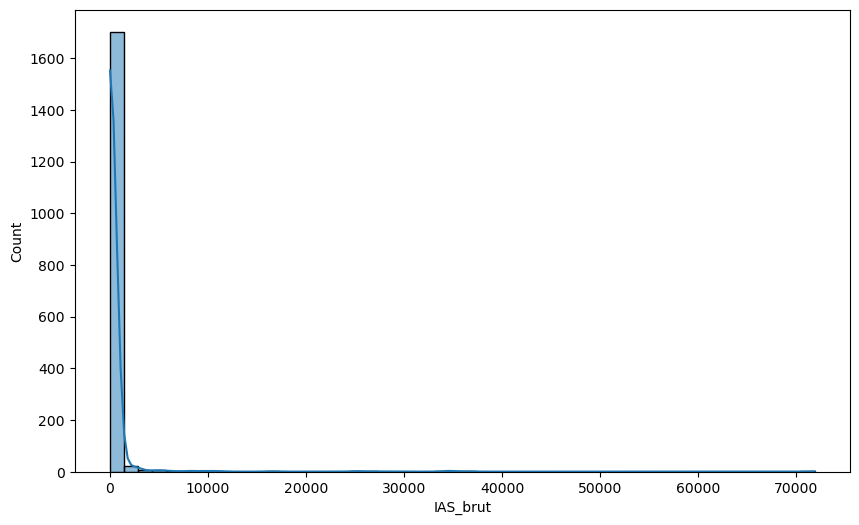

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df_2['IAS_brut'], bins=50, kde=True)

Les valeurs sont écrasés par la valeur 1.

# 4. Transformation en log

In [20]:
df_3 = df_2.copy()
df_3['IAS_brut_log'] = np.log(df_3['IAS_brut'])

In [21]:
print(df_3)

        PERIODE  IAS_brut  IAS_brut_log
0    2009-07-01       1.7      0.530628
1    2009-07-02       3.4      1.223775
2    2009-07-03       2.1      0.741937
3    2009-07-04       1.3      0.262364
4    2009-07-05      14.2      2.653242
...         ...       ...           ...
1747 2014-04-13      77.9      4.355426
1748 2014-04-14       2.7      0.993252
1749 2014-04-15       1.0      0.000000
1750 2014-04-16       1.6      0.470004
1751 2014-04-17       0.4     -0.916291

[1752 rows x 3 columns]


<Axes: xlabel='PERIODE', ylabel='IAS_brut_log'>

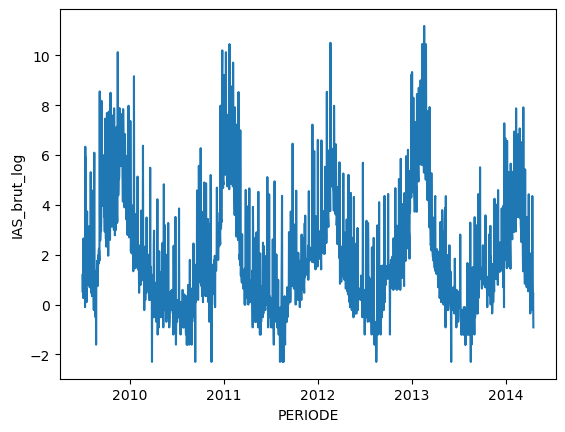

In [22]:
#plt.figure(figsize=(14, 7))
sns.lineplot(data=df_3, x='PERIODE', y='IAS_brut_log')

On constate qu'il y a une amélioration significative de la visualisation de la série temporelle juste après la linéarisation. 

A titre d'observation, la saisonnalité se démarque vraiment. En effet, on constate un accroissement des valeurs à partir de la moitié de chaque année avant d'atteindre un pic proche du début de l'année. Après les valeurs commencent à diminuer et répète le même comportement après.  

<Axes: xlabel='IAS_brut_log', ylabel='Count'>

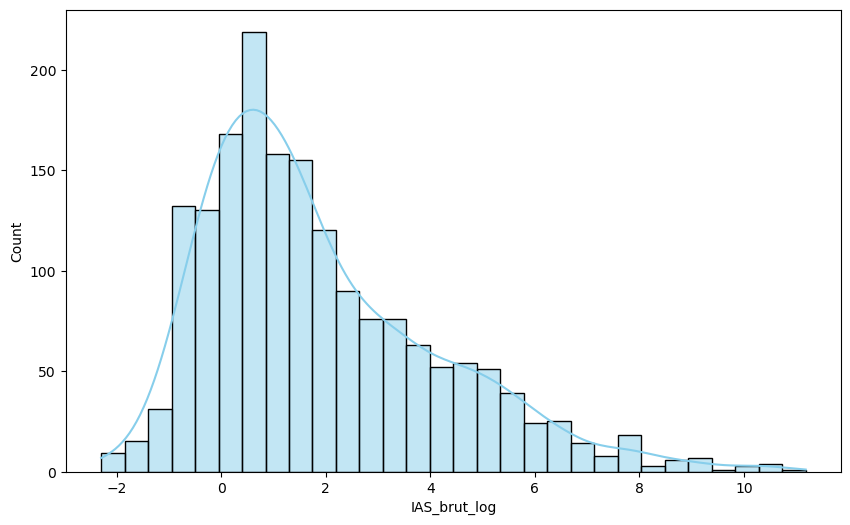

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df_3['IAS_brut_log'], bins=30, kde=True, color='skyblue')

La ditribution de la série est très visible maintenant.
## forme de la distribution : 
- asymétrique
- longue traine vers la droite (right-skewed)
- concentration autour de la mode

## Etendue
- -2 vers plus de 10
- les valeurs aberrantes sont plus de 10
- il y ainsi des valeurs entre 0 et 1.

# Question 5

In [24]:
from scipy.signal import periodogram

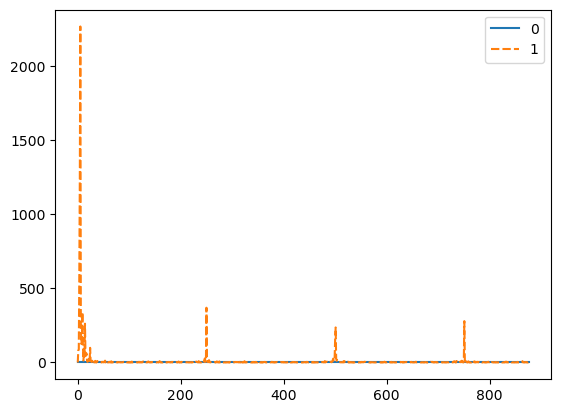

In [25]:
prd_gram = periodogram(df_3['IAS_brut_log'])
plot = sns.lineplot(prd_gram)

On va suivre la norme de représentation de periodogram.

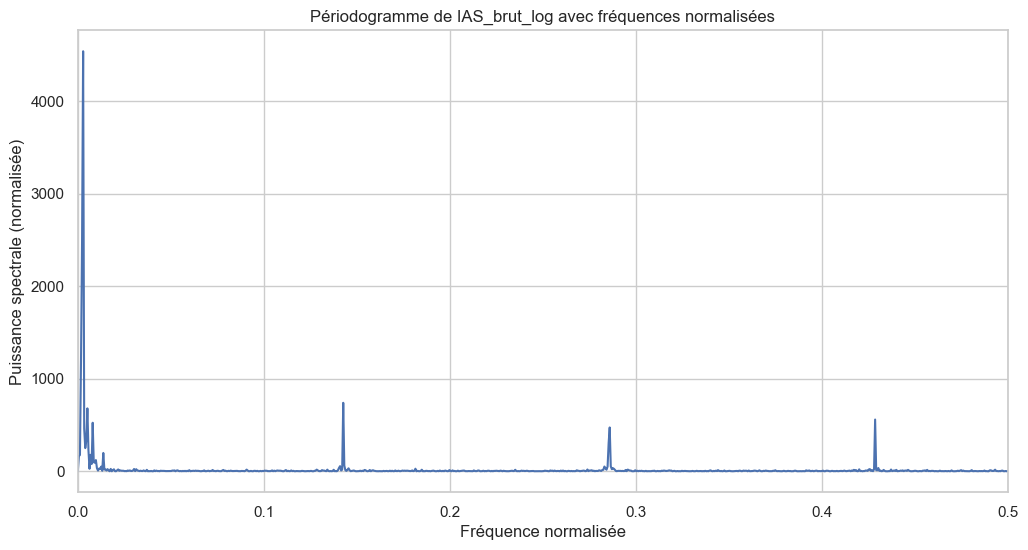

In [27]:
# Calculer le périodogramme
fs = 1
frequencies, powers = periodogram(df_3['IAS_brut_log'].values, fs=fs)

# Normaliser les fréquences pour l'affichage [-0.5, 0.5]
# Pour une série réelle, le spectre est symétrique, donc on peut doubler les puissances et utiliser seulement la moitié positive
normalized_frequencies = frequencies / fs
powers = powers * 2  # Double the power for one-sided spectrum

# Tracer le périodogramme
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=normalized_frequencies, y=powers)
plt.xlim(0, 0.5)  # Afficher uniquement la partie positive du spectre
plt.title('Périodogramme de IAS_brut_log avec fréquences normalisées')
plt.xlabel('Fréquence normalisée')
plt.ylabel('Puissance spectrale (normalisée)')
plt.show()

Les pics dans le périodogramme représentent les fréquences auxquelles la composante périodique du signal est la plus forte, autrement dit, là où le signal a le plus d'énergie.

- Pic à basse fréquence (proche de 0) : Ce pic indique qu'il y a une tendance ou un motif à long terme dans les données. Cela peut signifier que des variations lentes et de grande amplitude existent, telles qu'une tendance annuelle

# 6. Enlever la tendance périodique ou la saisonnalité

In [28]:
df_4 = df_3.copy()

In [29]:
# S'assurer que l'index est basé sur la période pour une différenciation facile
df_4.set_index('PERIODE', inplace=True)

# Calculer la différence pour une période de 1 an
T = 365
df_4['IAS_brut_log_filtre'] = df_4['IAS_brut_log'] - df_4['IAS_brut_log'].shift(T)

# Afficher les premières lignes pour vérifier le résultat
print(df_4.head(T + 5))

            IAS_brut  IAS_brut_log  IAS_brut_log_filtre
PERIODE                                                
2009-07-01       1.7      0.530628                  NaN
2009-07-02       3.4      1.223775                  NaN
2009-07-03       2.1      0.741937                  NaN
2009-07-04       1.3      0.262364                  NaN
2009-07-05      14.2      2.653242                  NaN
...              ...           ...                  ...
2010-07-01       1.0      0.000000            -0.530628
2010-07-02       0.9     -0.105361            -1.329136
2010-07-03       0.5     -0.693147            -1.435085
2010-07-04       1.2      0.182322            -0.080043
2010-07-05       0.6     -0.510826            -3.164068

[370 rows x 3 columns]


In [30]:
nombre_NA_2 = (df_4["IAS_brut_log_filtre"].isna().sum())
print(f"Nombre de zéros et de valeurs NaN (manquantes) dans 'IAS_brut': {nombre_NA_2}")

Nombre de zéros et de valeurs NaN (manquantes) dans 'IAS_brut': 365


In [31]:
df_5 = df_4.copy()

# Supprimer les 365 premières observations
df_5 = df_5.iloc[365:]

# Afficher les premières lignes pour vérifier le résultat
print(df_5.head())

            IAS_brut  IAS_brut_log  IAS_brut_log_filtre
PERIODE                                                
2010-07-01       1.0      0.000000            -0.530628
2010-07-02       0.9     -0.105361            -1.329136
2010-07-03       0.5     -0.693147            -1.435085
2010-07-04       1.2      0.182322            -0.080043
2010-07-05       0.6     -0.510826            -3.164068


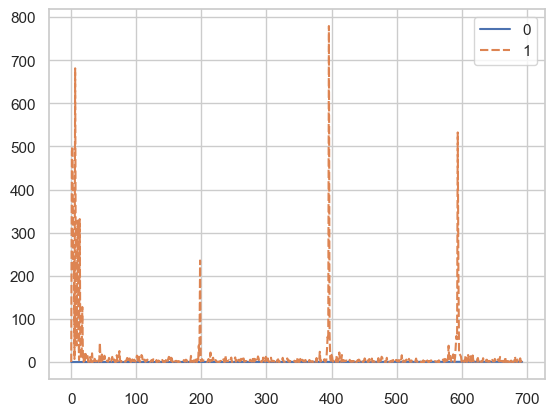

In [32]:
prd_gram = periodogram(df_5['IAS_brut_log_filtre'])
plot = sns.lineplot(prd_gram)

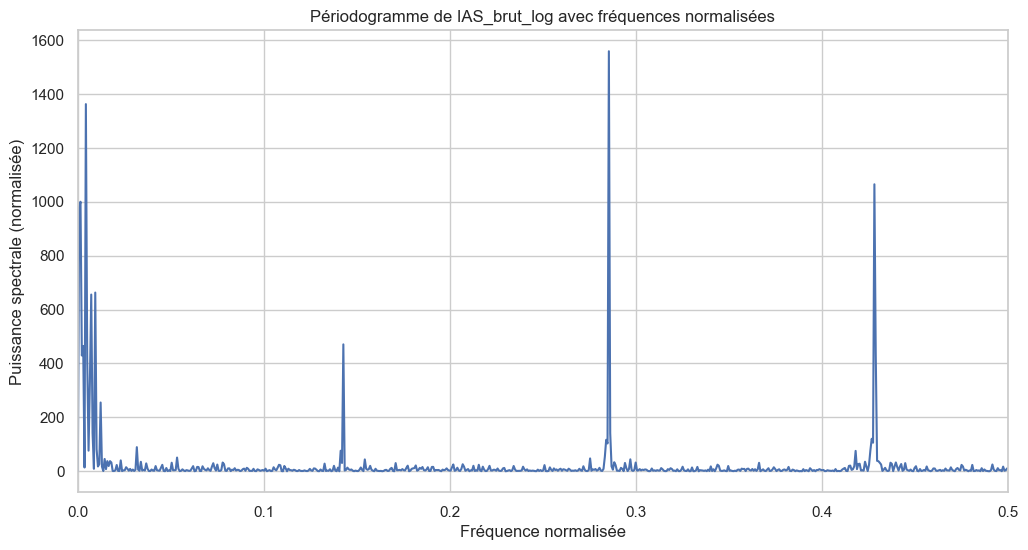

In [33]:
# Calculer le périodogramme
fs = 1  
frequencies, powers = periodogram(df_5['IAS_brut_log_filtre'].values, fs=fs)

# Normaliser les fréquences pour l'affichage [-0.5, 0.5]
# Pour une série réelle, le spectre est symétrique, donc on peut doubler les puissances et utiliser seulement la moitié positive
normalized_frequencies = frequencies / fs
powers = powers * 2  # Double the power for one-sided spectrum

# Tracer le périodogramme
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=normalized_frequencies, y=powers)
plt.xlim(0, 0.5)  # Afficher uniquement la partie positive du spectre
plt.title('Périodogramme de IAS_brut_log avec fréquences normalisées')
plt.xlabel('Fréquence normalisée')
plt.ylabel('Puissance spectrale (normalisée)')
plt.show()

T est annuel, on a supprimé donc la saisonnalité annuelle ici.

Pour un jeu de données échantillonné quotidiennement, la fréquence saisonnière annuelle correspond à f = 1/365 (en supposant une année non bissextile de 365 jours).

Après avoir appliqué le filtre, on voit que le pic dans le périodogramme à cette fréquence était très atténué passant de plus de 4000 à moins de 1400. Ce qui indique que la saisonnalité annuelle a été enlevé.

# 7. Prédictions

# Données “Trafic internet”

# 8.

In [44]:
df_traffic = pd.read_csv('lbl-tcp-3.tcp')

In [45]:
df_traffic.head()

,759103800.008185 1 2 23 2436 1
0,0.010445 2 1 2436 23 2
1,0.023775 1 2 23 2436 2
2,0.026558 2 1 2436 23 1
3,0.029002 3 4 3930 119 42
4,0.032439 4 3 119 3930 15


In [46]:
df_traffic = pd.read_csv('lbl-tcp-3.tcp', delim_whitespace=True, header=None, names=['Timestamp', 'Src', 'Dst', 'SrcPort', 'DstPort', 'Packets'])
df_traffic.head()

,Timestamp,Src,Dst,SrcPort,DstPort,Packets
0,7.591038e+08,1,2,23,2436,1
1,1.044500e-02,2,1,2436,23,2
2,2.377500e-02,1,2,23,2436,2
3,2.655800e-02,2,1,2436,23,1
4,2.900200e-02,3,4,3930,119,42


In [51]:
# Correcting timestamps to absolute time
start_time = df_traffic.loc[0, 'Timestamp']
df_traffic['Timestamp'] = df_traffic['Timestamp'].apply(lambda x: start_time + x if x < start_time else x)

In [52]:
# Define interval length (10 seconds)
interval_length = 10

# Convert Timestamp to intervals of 10 seconds from the start
df_traffic['Interval'] = ((df_traffic['Timestamp'] - start_time) / interval_length).astype(int)

In [53]:
# Calculate number of packets per 10-second interval
# This step seems to intend counting packets, but it's missing. Let's correct it:
df_traffic['PacketCount'] = 1  # Add a column to count packets
packets_per_interval = df_traffic.groupby('Interval')['PacketCount'].sum()

In [54]:
# Create a complete series for intervals (assuming a total number of intervals based on the max found)
num_intervals = packets_per_interval.index.max() + 1
full_series = pd.Series(index=np.arange(num_intervals), data=0)  # Initialize with 0
full_series.update(packets_per_interval)  # Update with actual computed values

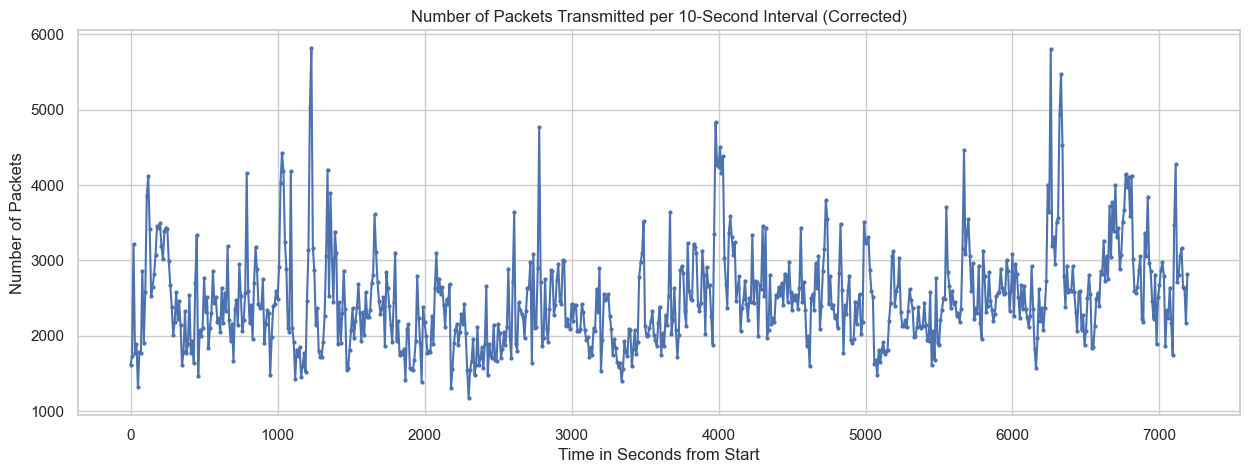

In [55]:
# Plot the corrected time series
plt.figure(figsize=(15, 5))
plt.plot(full_series.index * interval_length, full_series.values, marker='o', linestyle='-', markersize=2)
plt.title('Number of Packets Transmitted per 10-Second Interval (Corrected)')
plt.xlabel('Time in Seconds from Start')
plt.ylabel('Number of Packets')
plt.grid(True)
plt.show()

# 9. AR(p)

In [61]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [62]:
data = full_series

In [63]:
# Définir la gamme de valeurs pour p et le nombre de segments (chunks)
p_max = 5  # Par exemple, tester de 1 à 5
n_chunks = 5
chunk_size = int(len(data) / n_chunks)

# Enregistrer les performances pour chaque modèle
model_performance = {}

In [64]:
for p in range(1, p_max + 1):
    mse_scores = []
    
    for k in range(n_chunks - 1):
        # Créer les ensembles d'entraînement et de test pour le fold actuel
        train = data[:chunk_size * (k + 1)]
        test = data[chunk_size * (k + 1):chunk_size * (k + 2)]
        
        # Entraîner le modèle ARIMA sur l'ensemble d'entraînement
        model = ARIMA(train, order=(p, 0, 0))
        model_fit = model.fit()
        
        # Faire des prédictions sur l'ensemble de test
        predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)
        
        # Calculer l'erreur quadratique moyenne (MSE) pour le fold actuel
        mse = mean_squared_error(test, predictions)
        mse_scores.append(mse)
    
    # Calculer la performance moyenne du modèle sur tous les folds
    model_performance[p] = np.mean(mse_scores)

In [65]:
# Sélectionner le modèle avec la meilleure performance moyenne
best_p = min(model_performance, key=model_performance.get)
best_mse = model_performance[best_p]

print(f"Le meilleur modèle AR(p) a un p de {best_p} avec une MSE moyenne de {best_mse}.")

Le meilleur modèle AR(p) a un p de 2 avec une MSE moyenne de 411933.1033091665.


Le meilleur modèle auto-régressif AR(p) pour votre série temporelle, qui représente le nombre de paquets transmis par intervalle de 10 secondes dans un réseau, est un AR(2). Ce modèle utilise les données des deux derniers intervalles pour prédire le nombre de paquets dans l'intervalle courant. L'erreur quadratique moyenne (MSE) pour ce modèle est de 411,933.1, ce qui sert d'indicateur de la précision des prédictions du modèle.

Cette valeur MSE doit être mise en contexte par rapport à l'échelle des données de la série temporelle pour déterminer si l'erreur de prédiction est acceptable. Si la MSE est basse par rapport à l'amplitude des données, cela suggère que le modèle prédit avec une certaine précision. Sinon, il peut être nécessaire d'explorer des modèles plus complexes ou de revoir la préparation des données.

Il est également recommandé de comparer ce modèle à d'autres modèles ou à une valeur de référence pour évaluer sa performance relative, ainsi que d'analyser les résidus pour détecter d'éventuelles structures restantes qui pourraient indiquer des informations non capturées par le modèle AR(2).

In [66]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Supposons que full_series soit la série temporelle que vous voulez utiliser
data = full_series

# Définir la gamme de valeurs pour p et le nombre de segments (chunks)
p_max = 5  # Par exemple, tester de 1 à 5
n_chunks = 5
chunk_size = int(len(data) / n_chunks)

# Enregistrer les performances pour chaque modèle
model_performance = {}
aic_values = {}
bic_values = {}

for p in range(1, p_max + 1):
    mse_scores = []
    
    for k in range(n_chunks - 1):
        # Créer les ensembles d'entraînement et de test pour le fold actuel
        train = data[:chunk_size * (k + 1)]
        test = data[chunk_size * (k + 1):chunk_size * (k + 2)]
        
        # Entraîner le modèle ARIMA sur l'ensemble d'entraînement
        model = ARIMA(train, order=(p, 0, 0))
        model_fit = model.fit()
        
        # Enregistrer les valeurs AIC et BIC
        aic_values[p] = model_fit.aic
        bic_values[p] = model_fit.bic
        
        # Faire des prédictions sur l'ensemble de test
        predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)
        
        # Calculer l'erreur quadratique moyenne (MSE) pour le fold actuel
        mse = mean_squared_error(test, predictions)
        mse_scores.append(mse)
    
    # Calculer la performance moyenne du modèle sur tous les folds
    model_performance[p] = np.mean(mse_scores)

# Sélectionner le modèle avec la meilleure performance moyenne
best_p_mse = min(model_performance, key=model_performance.get)
best_mse = model_performance[best_p_mse]

# Sélectionner le modèle avec le meilleur AIC
best_p_aic = min(aic_values, key=aic_values.get)
best_aic = aic_values[best_p_aic]

# Sélectionner le modèle avec le meilleur BIC
best_p_bic = min(bic_values, key=bic_values.get)
best_bic = bic_values[best_p_bic]

print(f"Le meilleur modèle AR(p) selon MSE a un p de {best_p_mse} avec une MSE moyenne de {best_mse}.")
print(f"Le meilleur modèle AR(p) selon AIC a un p de {best_p_aic} avec un AIC de {best_aic}.")
print(f"Le meilleur modèle AR(p) selon BIC a un p de {best_p_bic} avec un BIC de {best_bic}.")


Le meilleur modèle AR(p) selon MSE a un p de 2 avec une MSE moyenne de 411933.1033091665.
Le meilleur modèle AR(p) selon AIC a un p de 1 avec un AIC de 8811.759138888701.
Le meilleur modèle AR(p) selon BIC a un p de 1 avec un BIC de 8824.82746187079.


# 10. 

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  720
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -5516.273
Date:                Sat, 24 Feb 2024   AIC                          11040.547
Time:                        22:08:37   BIC                          11058.864
Sample:                             0   HQIC                         11047.618
                                - 720                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2486.1042     63.490     39.158      0.000    2361.667    2610.542
ar.L1          0.5615      0.028     20.353      0.000       0.507       0.616
ar.L2          0.0827      0.031      2.626      0.0

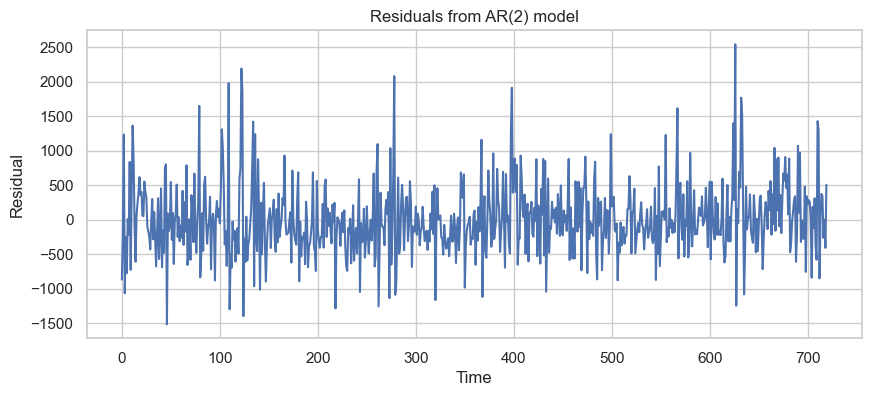

C:\Users\Mita\AppData\Local\Temp\ipykernel_21520\635294571.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, label='Residuals density', shade=True)


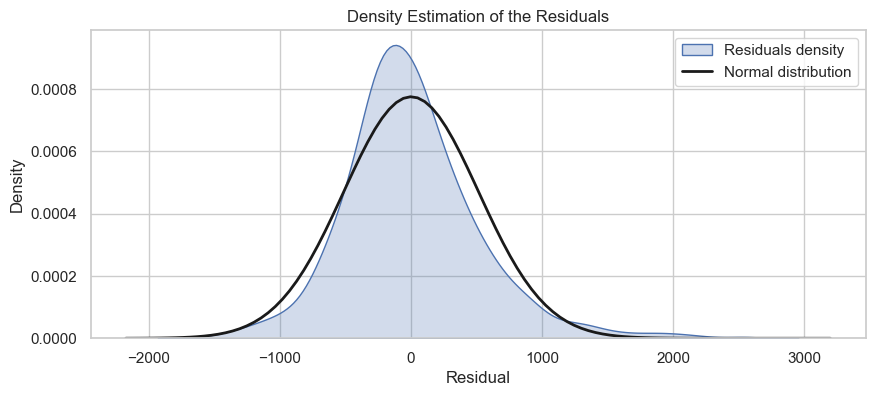

In [67]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Ajuster le modèle AR(2)
model = ARIMA(data, order=(2, 0, 0))
model_fit = model.fit()

# Afficher les paramètres
print(model_fit.summary())

# Tracer les résidus
residuals = model_fit.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals from AR(2) model')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.show()

# Estimation de la densité des résidus
plt.figure(figsize=(10, 4))
sns.kdeplot(residuals, label='Residuals density', shade=True)

# Densité de la distribution normale avec la même moyenne et écart-type que les résidus
mean, std = norm.fit(residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal distribution')

plt.title('Density Estimation of the Residuals')
plt.xlabel('Residual')
plt.ylabel('Density')
plt.legend()
plt.show()

**Graphique des Résidus**
Le graphique des résidus montre la différence entre les valeurs réelles et les prédictions du modèle à chaque point dans le temps. Les résidus semblent être centrés autour de zéro sans montrer de schémas clairs ou de tendances persistantes, ce qui est bon signe. Cependant, il y a des pics occasionnels qui suggèrent des erreurs de prédiction plus grandes à certains moments. 

**Estimation de la Densité des Résidus**
Le graphique de la densité des résidus par rapport à une distribution normale théorique montre que les résidus ont une distribution légèrement asymétrique avec un biais positif (skewness) comme indiqué par le Skew supérieur à zéro dans les résultats du modèle. La distribution des résidus semble un peu plus étalée (kurtosis élevée) par rapport à la distribution normale, ce qui est confirmé par le test de Jarque-Bera qui est significatif, suggérant que les résidus ne suivent pas exactement une distribution normale.

**Résultats du Modèle**
Les coefficients du modèle ARIMA(2, 0, 0) sont significatifs, comme le montrent les valeurs de P inférieures à 0.05. Cela suggère que les deux termes auto-régressifs apportent une contribution significative à la modélisation de la série temporelle.

Le coef pour ar.L1 est 0.5615, ce qui implique que le premier décalage (lag) de la série temporelle a un impact fort et positif sur la valeur courante.
Le coef pour ar.L2 est 0.0827, suggérant que le deuxième décalage a également un impact positif, mais beaucoup plus faible.
La variance des erreurs sigma2 est assez grande, ce qui pourrait expliquer la taille de certains des grands résidus observés sur le graphique.

Le test de Ljung-Box a une valeur de p élevée, ce qui indique que les résidus sont indépendants dans le temps (aucune autocorrélation significative), et l'hétéroscédasticité n'est pas présente (comme indiqué par le test d'Heteroskedasticity avec une valeur de p de 0.18).

**Conclusion**
Globalement, le modèle AR(2) semble capturer une partie significative de la structure temporelle des données, mais les résidus indiquent qu'il pourrait y avoir de la place pour une amélioration. L'asymétrie et la kurtosis élevées des résidus pourraient suggérer d'examiner des modèles qui peuvent gérer de meilleures distributions des erreurs, comme des modèles avec des termes de moyenne mobile ou des transformations des données pour réduire les pics et l'asymétrie. Il peut également être utile de considérer des modèles saisonniers (SARIMA) si la série temporelle présente une saisonnalité non capturée par le modèle AR(2) actuel.